In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sS = pd.read_csv("sampleSubmission.csv")
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV

train['推薦類型'].replace(['肌力',"柔軟度","心肺","肌耐力","error","錯誤","無此類別"],[0,1,2,3,np.nan,np.nan,np.nan] , inplace = True)
train = train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
train['推薦類型'] = train['推薦類型'].astype('int64')

<AxesSubplot:>

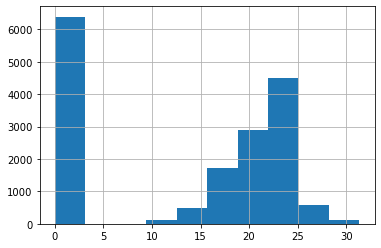

In [2]:
BMI = 0
out_BMI = train.query("BMI < @BMI")
out_BMI_list =out_BMI.index.tolist()
train = train.drop(out_BMI_list)
train["BMI"].hist()

<AxesSubplot:>

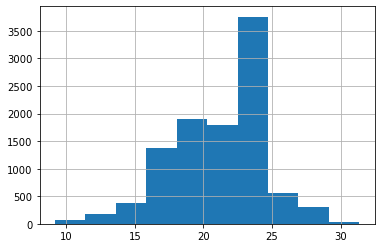

In [3]:
BMI = 9
out_BMI = train.query("BMI < @BMI")
out_BMI_list =out_BMI.index.tolist()
train = train.drop(out_BMI_list)
train["BMI"].hist()

<AxesSubplot:>

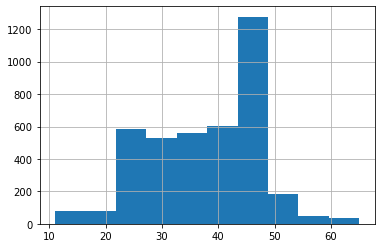

In [4]:
age = 70
out_age = train.query("年齡 > @age")
out_age_list =out_age.index.tolist()
train = train.drop(out_age_list)
train["年齡"].hist()

In [5]:
train.describe()

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力,推薦類型
count,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000,3981.000000
mean,0.575735,37.709872,21.131758,0.315499,0.610902,0.600603,0.606380,0.645566,0.579503,0.530771,0.652349,0.331324,0.596584,0.717408,0.726451,1.155740
std,0.494293,9.668005,3.196389,0.560360,0.586337,0.567760,0.580287,0.558825,0.606516,0.581430,0.546540,0.531893,0.541289,0.536854,0.548434,0.955734
min,0.000000,11.000000,9.188221,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-4.000000,-4.000000,-5.000000,0.000000
25%,0.000000,30.000000,19.031142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,39.000000,21.986666,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,46.000000,23.118748,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,65.000000,31.345358,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [6]:
test.describe()

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力
count,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,0.527157,36.027157,20.951850,0.348442,0.642572,0.571286,0.585463,0.596246,0.620407,0.568890,0.667732,0.313898,0.569289,0.693291,0.684105
std,0.499312,9.863886,3.534415,0.476525,0.479290,0.494942,0.492691,0.490698,0.485334,0.495281,0.471074,0.464122,0.495225,0.461174,0.464918
min,0.000000,11.000000,9.693328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,18.694843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,36.000000,21.875000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,45.000000,23.362953,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,65.000000,31.788598,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
y = 1
n = 0
out = train.query("拳擊 > @y ")
outlist =out['拳擊'].tolist()

out = train.query("拳擊 < @n ")
outlist =out['拳擊'].tolist()
outlist

[-3.0,
 -5.0,
 -3.0,
 -4.0,
 -2.0,
 -3.0,
 -3.0,
 -3.0,
 -4.0,
 -4.0,
 -5.0,
 -2.0,
 -5.0,
 -4.0,
 -5.0,
 -4.0]

In [8]:
out3 = train.query("拳擊 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("拳擊 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("器材 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("器材 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("有氧 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("有氧 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("舞蹈 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("舞蹈 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("高強度間歇 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("高強度間歇 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("瑜伽 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("瑜伽 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("肌力訓練 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("肌力訓練 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("燃脂 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("燃脂 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("減脂瘦身 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("減脂瘦身 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("增加肌肉 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("增加肌肉 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("增強體魄 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("增強體魄 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("舒緩壓力 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("舒緩壓力 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

X = train.drop(["推薦類型"], axis =1)
y = train["推薦類型"]
train.describe()

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力,推薦類型
count,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000
mean,0.575281,37.751404,21.124913,0.312360,0.621348,0.609551,0.608989,0.654494,0.597472,0.538202,0.659831,0.332022,0.599719,0.728090,0.733427,1.111236
std,0.494370,9.672220,3.178917,0.463521,0.485119,0.487920,0.488045,0.475600,0.490476,0.498608,0.473832,0.471005,0.490024,0.445006,0.442229,0.919024
min,0.000000,11.000000,9.188221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,19.031142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,39.000000,21.910401,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,46.000000,23.095879,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,65.000000,31.345358,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

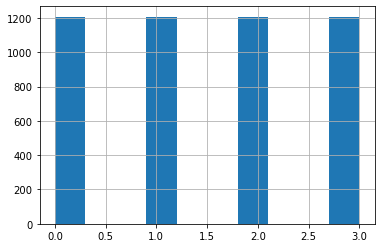

In [9]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X,y)
y.hist()

In [10]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 1000)
RF.fit(X,y)
RF.feature_importances_

array([0.04627823, 0.22696667, 0.18761261, 0.07816409, 0.03289569,
       0.04096903, 0.03843842, 0.02918738, 0.05460713, 0.06944314,
       0.03311233, 0.03735075, 0.05292987, 0.03385526, 0.03818942])

In [11]:
X_train, X_val, y_train, y_val = train_test_split(
   X, y, test_size=0.25)

In [12]:
RF.fit(X_train, y_train)
print(RF.score(X_train,y_train))
print(RF.score(X_val,y_val))
scores = cross_val_score(RF,X,y,cv = 5,scoring = 'accuracy')
scores.mean()

0.9911626622479978
0.8467274233637117


0.8535671912378378

In [13]:
RF.fit(X,y)
y_pred = RF.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd.to_csv("e94084032.csv", index = False)

In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


def accuracy_score(y_val,y_pred):
    Sum = 0
    y_val = y_val.tolist()
    y_pred = y_pred.tolist()
    for i in range(len(y_pred)):
        if y_val[i] == y_pred[i]:
            Sum+=1
    score = Sum/len(y_pred)
    
    return score



In [15]:
rnd_clf = RandomForestClassifier(random_state=0,n_estimators=1000)
#svm_clf = SVC(random_state=0)
xgb_clf =  XGBClassifier(random_state=0, n_estimators=1000, max_depth = 8,learning_rate =0.1,min_child_weight=1)

voting_clf = VotingClassifier(estimators=[('xg', xgb_clf), ('rf', rnd_clf)],
 voting='hard')

voting_clf.fit(X_train, y_train)

for clf in (xgb_clf, rnd_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:11:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:11:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.8342999171499585
RandomForestClassifier 0.8475559237779619
[13:11:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


VotingClassifier 0.8384424192212097


In [16]:
clf.fit(X,y)
y_pred = RF.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd.to_csv("e94084032.csv", index = False)

C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:12:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
